

# Project: Investigate a Dataset - [No show appointments for patients.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## IntroductionThis dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column


### Dataset Description 

we have a csv file contains the data we will analyze.

### Question(s) for Analysis
what are the factors that affect the attendance of patients in their scheduled apponitment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

 In this section of the report we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#shape of data
df.shape

Data consists of 110527 rows(appointments) and 14 columns.

In [3]:
#check for duplicates
df.duplicated().sum()

0

There is no duplicated rows.

In [4]:
#number of unique values
df['PatientId'].nunique()

62299

There is only 62299 unique values.

In [5]:
#number of duplicated values
df.PatientId.duplicated().sum()

48228

There is 48228 duplicated patientIds. 

In [6]:
#number of duplicatedId and no Noshow
df.duplicated(['PatientId', 'No-show']).sum()

38710

There are 38710 patients have the same IDs and the same showing status so we will remove them later. 

In [7]:
#searching for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no mising values.

In [8]:
#data description
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age is 37 , the maximum age is 115 and the minmum age is -1.There is only single value of -1 so it is mostly a mistake so we will remove it as it will not affect our data analysis.

In [9]:
#know the row index of -1 value in the age
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


# Data cleaning

In [10]:
#remove the -1 value
df.drop(index=99832,inplace=True)
 

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
#renaming columns
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#removing duplicated Ids with only identical showing status
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [14]:
#deleting data not used
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Data Wrangling Summary
After gathering data from csv file we showed the first rows of the data set then removed duplicated patientsIDs with identical showing status then we made sure that there is no missing data then we renamed the columns and removed the data which are not important


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. we will **Compute statistics** and **create visualizations** with the goal of addressing the research questions that we posed in the Introduction section. 






### visualization

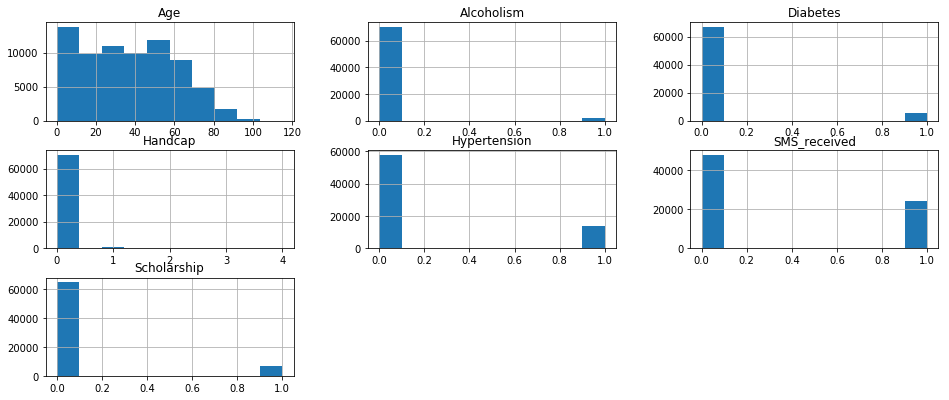

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,6.5));


In [16]:
#making two groups of patients according to their showing status
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

number of showed patients is greater than non showed patients

In [17]:
#calculating average of show and no show patients
df[show].mean(),df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

we need to focus more on sms campaign as number of showed patients who received sms are less than non showed patients who received sms.

# Factors affect the attendance rate

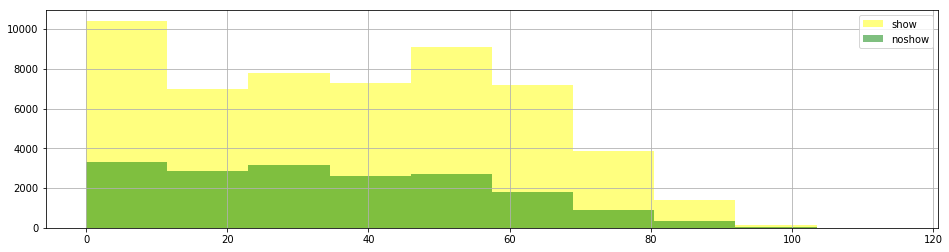

In [18]:
# the effect of age on the attendance rate 
def attendance(df, col_name, show, noshow):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='yellow',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='green',label='noshow')
    plt.legend();
attendance(df,'Age',show,noshow)    
    


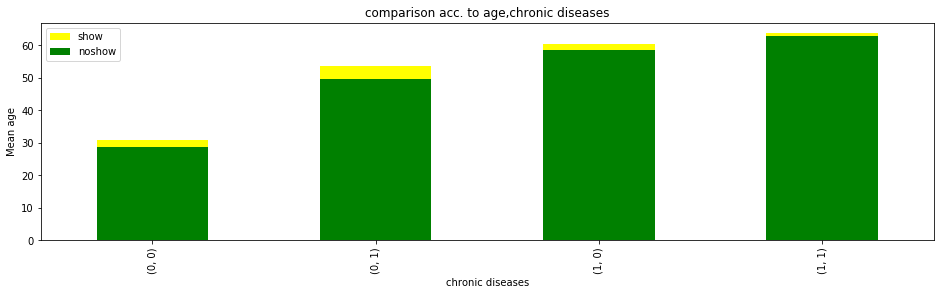

In [19]:
#The effect of both age and chronic disease on the attendance rate
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='yellow',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='green',label='noshow')
plt.legend();
plt.title('comparison acc. to age,chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');



In [20]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

There is a relation between age and chronic diseases but there is no relation between chronic diseases and the attendance rate.

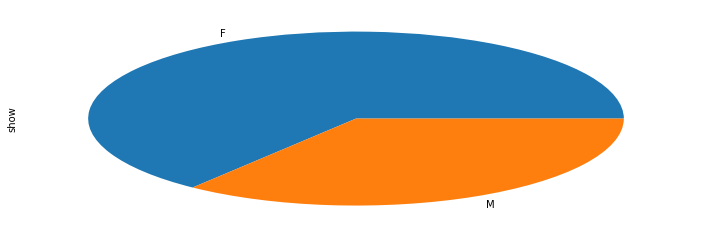

In [21]:
#The perecentage of male and female attending
def attendance(df,col_name,show,noshow):
    plt.figure(figsize=[12,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
attendance(df,'Gender',show,noshow)


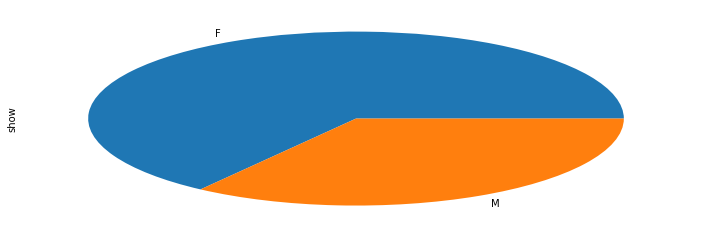

In [22]:
#what is the percentage of female and male absent
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[12,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
attendance(df,'Gender',show,noshow)    

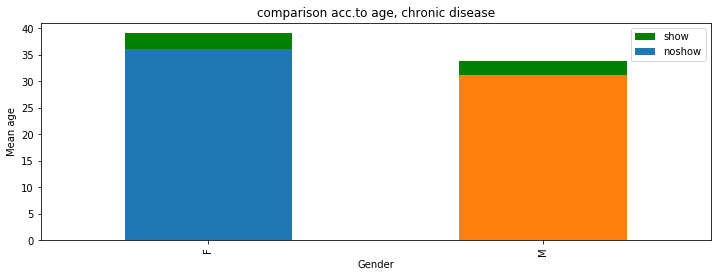

In [23]:
#The effect of age and gender together on the attendance
plt.figure(figsize=[12,4])
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='green',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',label='noshow')
plt.legend();
plt.title('comparison acc.to age, chronic disease')
plt.xlabel('Gender')
plt.ylabel('Mean age');

In [24]:
print(df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean(),
df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


The mean and the median of both male and female are mostly the same. 

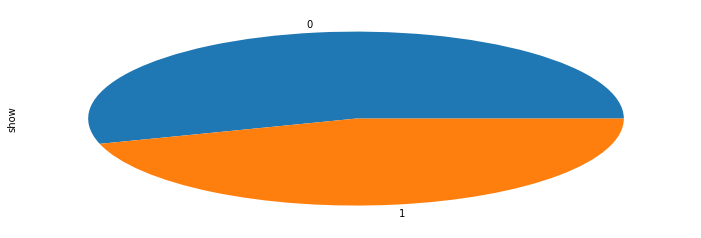

In [25]:
#The effect of sms receiving on the attendance
def attendancet(df, col_name, show, noshow):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=15,color='yellow',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=15,color='green',label='noshow') 
    plt.legend();
attendance(df, 'SMS_received', show, noshow)    

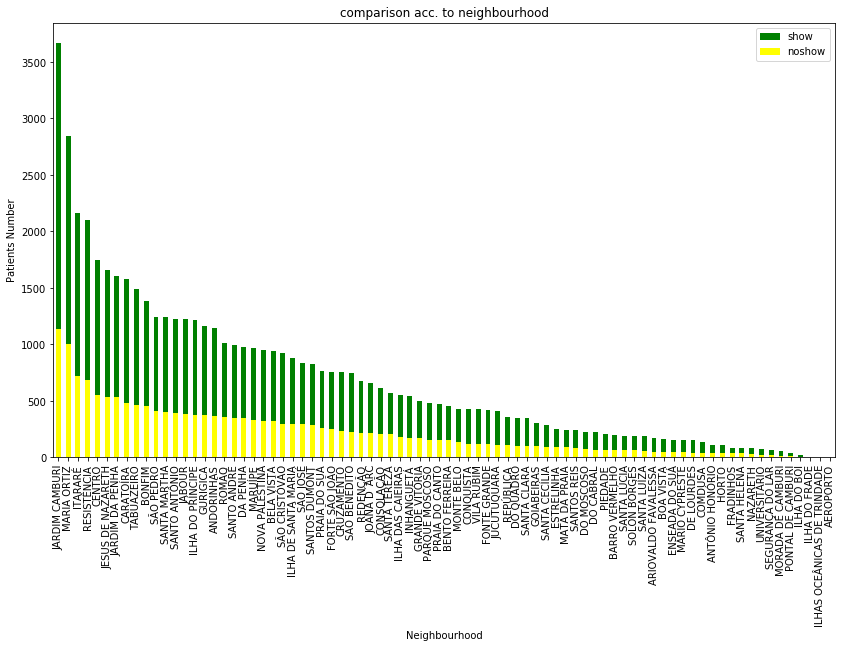

In [26]:
#effect of neighbourhood
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='Green',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='Yellow',label='noshow')
plt.legend()
plt.title('comparison acc. to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

There is a strong correlation between the neighbourhood and the attendance.

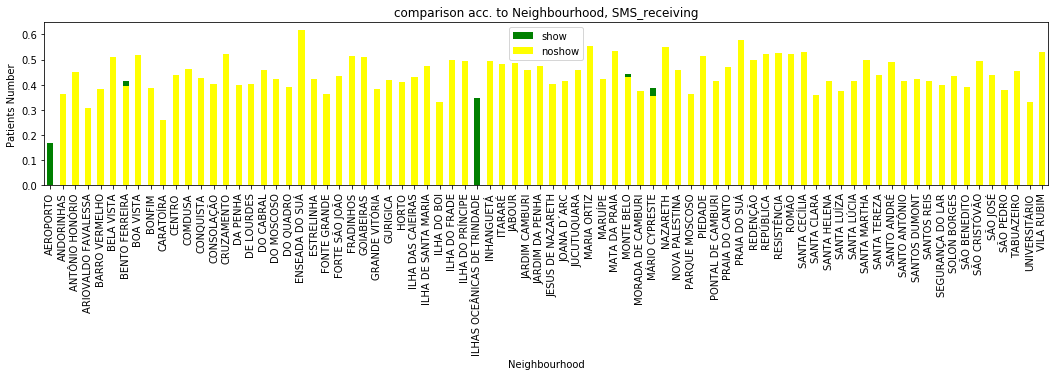

In [29]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='Green',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='Yellow',label='noshow')
plt.legend();
plt.title('comparison acc. to Neighbourhood, SMS_receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

<a id='conclusions'></a>
# conclusion

SMS and Ages have agreat effect on the number of showing patients from specific neighbourhood.
We need to give more interest to our sms campaign as the number of showing patients without receiving sms is greater than showing patients with receiving sms.


# Limitations
There is no strong correlation between the showing rate and gender and chronic diseases.

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0